# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [53]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [54]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**c.** The number of unique users in the dataset.

In [56]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [57]:
df.query('converted == 1').user_id.nunique() / df.user_id.nunique()

0.12104245244060237

In [58]:
df.user_id.nunique()

290584

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [59]:
x= df.query('group == "treatment" and landing_page == "new_page"').user_id.nunique()
x

145310

**f.** Do any of the rows have missing values?

In [60]:
df.query('group == "treatment" and landing_page == "new_page"').user_id.nunique()

145310

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [61]:
x= df.query('group == "treatment" and landing_page != "new_page"').index
y= df.query('group == "control" and landing_page != "old_page"').index
z=x.append(y)
len(z)

3893

In [62]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2= df.drop(labels= z , axis=0)
df2.shape[0]

290585

In [63]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [64]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [65]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [66]:
df2.loc[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [67]:
# Remove one of the rows with a duplicate user_id..
df2.drop(index= 2893, inplace= True)
# Check again if the row with a duplicate user_id is deleted or not
df2.loc[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [68]:
p_pop=(df2['converted'] == 1).mean()
p_pop

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [69]:
df2_control= df2.query("group == 'control'")
p_control_converted= (df2_control['converted'] == 1).mean()

In [70]:
p_control_converted

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [71]:
df2_treatment= df2.query("group == 'treatment'")
p_treatment_converted= (df2_treatment['converted'] == 1).mean()
p_treatment_converted

0.11880806551510564

In [72]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff= p_treatment_converted - p_control_converted
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [73]:
(df2["group"] == 'treatment').mean()

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

**The new treatment group had less conversion rate. the control group had approximately 0.158% higher conversion rate.**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**Put your answer here.** 
<p> $H_0$ = $p_{new}$ - $p_{old}$ <= 0 
<p> $H_1$ = $p_{new}$ - $p_{old}$ > 0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [74]:
p_new = df2.converted.mean()

p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [75]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [76]:
n_new = df2_treatment.user_id.nunique()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [77]:
n_old = df2_control.user_id.nunique()
n_old

145274

In [78]:
p_new - p_old

0.0

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [79]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(2, size=n_new
                                      , p=[p_new, 1-p_new])
p0_new=new_page_converted.mean()
p0_new

0.88068956025049894

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [80]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice(2, size=n_old
                                      , p=[p_old, 1-p_old])
p0_old= old_page_converted.mean()
p0_old

0.87963434613213654

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [81]:
diff = p0_new - p0_old
diff

0.001055214118362402


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [82]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice(2, size=n_new
                                      , p=[p_new, 1-p_new])
    old_page_converted = np.random.choice(2, size=n_old
                                      , p=[p_old, 1-p_old])
    p0_new=new_page_converted.mean()
    p0_old= old_page_converted.mean()
    p_diffs.append(p0_new - p0_old)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


In [83]:
diffs = np.array(p_diffs)

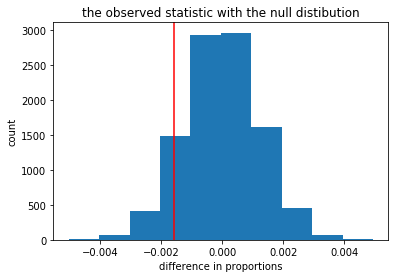

In [119]:
plt.hist(diffs);
plt.axvline(x= obs_diff, color= 'red')
plt.xlabel('difference in proportions')
plt.ylabel('count')
plt.title('the observed statistic with the null distibution');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [86]:
p= (obs_diff < diffs).mean()
p

0.90129999999999999

**k.** Please explain in words what you have just computed in part **j** above.

 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

**Answer** <p>
* I created a sampling distribution of the difference in proportions under the null hypothesis.<p>
* Plotted the null distribution.<p>
* Plotted the observed statistic with the null distibution
* Computed the p-value which is the probability of obtaining results equal to or more extreme than the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct.<p>
* The p-value exceeds Type I error rate (0.05), so we fail to reject the null hypothesis and we have no evideces to claim that the new page converts more users than the old pne.<p>



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [87]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page" & converted == "1"').count()[0]

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page" & converted == "1"').count()[0]

# # number of individuals who were shown the old_page
n_old = df2.query('landing_page == "old_page"').count()[0]

# # number of individuals who received new_page
n_new = df2.query('landing_page == "new_page"').count()[0]

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.





Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---


In [88]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],
                                              [n_old, n_new])
print(z_score, p_value) 

1.31092419842 0.189883374482


In [89]:
from scipy.stats import norm
# how significant is our z-score
norm.cdf(z_score) 

0.90505831275902449

In [90]:
# value at 95% confidence interval
norm.ppf(1-(0.05/2)) 

1.959963984540054

**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


**Answer**<p>
* The z-score of 1.311 is less than value at 95% confidence interval, which menas it falls within the confidence interval range of 95%.<p>
* We fail to reject the null hypothesis. We don't have evidence that supports the new page converting more users than the old page.<p>
* The p-value(0.189) is different than what we computed in parts j and k which is expected since the null and alternative hypothesis assumed that the p_new and p_old are the same and that converting users from the old page or the new page is the same.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [91]:
# creating dummy variables
df2[['ab_page','treatment']] = pd.get_dummies(df2['group'])
# dropping the unnecessary columns
df2 = df2.drop('treatment', 1)
# create intercept column
df2['intercept'] = 1

df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [93]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [97]:
results.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-05-01 21:12 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_page       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


In [95]:
np.exp(0.0150)

1.0151130646157189

**Answer**<p>
* The ab_page is statistically significant.
* Holding all other factors constant, conversion is 1.015 times as likely using the old page than the new page.<p>
* The p-value found in the logistic regression model is 0.19 and it's different than what we calculated in parts j and k because our null and alternative hypthesis model were assuming that there is an equal probability of the old and new page converting users.<p>
*  The Logistic Regression performed is a two-tailed test, while the z-test in Part II was one-tailed test.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**<p>
* Some factors like the time taken to test the new website and the age of the converted users would be helpful.
* Also increasing the number of factors/variable will affect the confidence intervals and efficiency of the analysis.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [98]:
# Read the countries.csv
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [103]:
# Join with the df2 dataframe
new_df = df2.join(df3.set_index('user_id'), on='user_id')
new_df.head(10)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,US
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,CA
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,US
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,CA


In [104]:
# Create the necessary dummy variables
new_df[['CA','UK', 'US']] = pd.get_dummies(new_df['country'])
# drop the country column since this is not necessary
new_df = new_df.drop('country', 1)
new_df.head(10)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,1,0,0


In [106]:
new_df.query('US == "1"').converted.mean(),\
new_df.query('UK == "1"').converted.mean(),\
new_df.query('CA == "1"').converted.mean()

(0.1195468006423762, 0.12059448568984076, 0.11531829781364232)

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [108]:
new_df['ab_page_US'] = new_df['US'] * new_df['ab_page']
new_df['ab_page_UK'] = new_df['UK'] * new_df['ab_page']
new_df['ab_page_CA'] = new_df['CA'] * new_df['ab_page']

In [111]:
new_df.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,ab_page_UK,ab_page_CA,ab_page_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,0,0,1,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,0,0,1,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1,0,0,1


In [113]:
# Fit your model, and summarize the results
log_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page_UK', 'ab_page_CA']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366121
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-05-01 21:36 AIC:              212783.9575
No. Observations:   290584           BIC:              212815.6965
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9966    0.0062  -321.9637  0.0000  -2.0088  -1.9845
ab_page_UK    0.0044    0.0173     0.2544  0.7992  -0.0295   0.0383
ab_page_CA   -0.0074    0.0370    -0.1999  0.8416  -0.0798   0.0650
==================================================================

"""

In [114]:
np.exp(results.params)

intercept     0.135794
ab_page_UK    1.004408
ab_page_CA    0.992641
dtype: float64

**Conclusion**<p>
* By looking at the ratio of the interaction between country and ab_page, user conversion in each country is almost the same.<p>
* We fail to reject the null hypothesis.<p>
* There is no evidence that the new page converts more users than the old one.<p>

In [120]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0